In [3]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

file_path = '/content/flipkart_data.csv'
df = pd.read_csv(file_path)


df.head()


,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5


In [4]:
df.head()

,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5


In [5]:
df.tail()

,review,rating
9971,GoodREAD MORE,5
9972,Everything is amazimg but the built is very li...,5
9973,GoodREAD MORE,5
9974,Best headphone i have ever used....READ MORE,5
9975,NiceREAD MORE,5


In [6]:
df.dtypes

,0
review,object
rating,int64


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df['rating'].value_counts()

,count
rating,
5,5726
4,2365
3,884
1,691
2,310


<Axes: ylabel='count'>

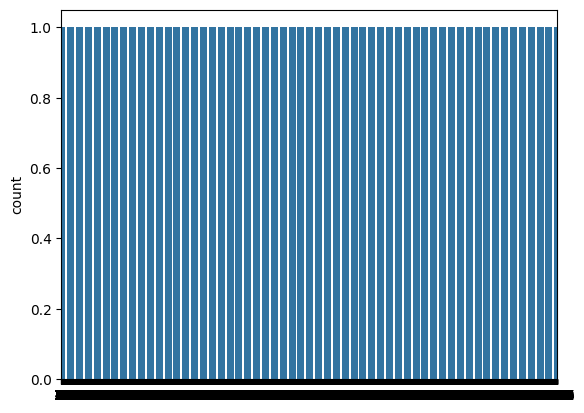

In [9]:
sns.countplot(df['rating'])


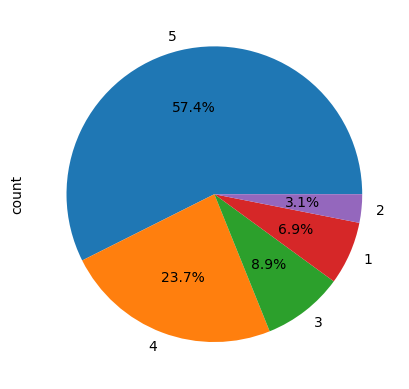

In [10]:
piechart = df['rating'].value_counts().plot(kind='pie', autopct='%1.1f%%')

In [11]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_reviews_stopwords(df):
    df['review'] = df['review'].str.lower()
    df['review'] = df['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
    df['sentiment'] = df['rating'].apply(lambda x: 1 if x >= 4 else 0)
    return df

df_cleaned = preprocess_reviews_stopwords(df)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


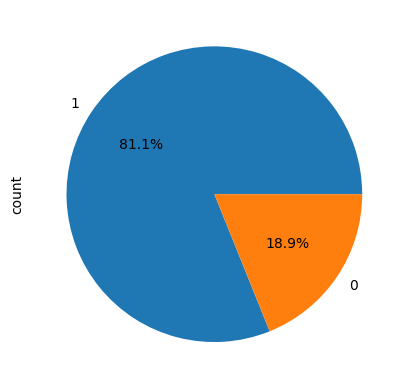

In [12]:
piechart = df['sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%')

In [13]:
df['sentiment'].value_counts()

,count
sentiment,
1,8091
0,1885


In [14]:
label_df = df['sentiment'].value_counts().index

In [15]:
value_df = df['sentiment'].value_counts().values

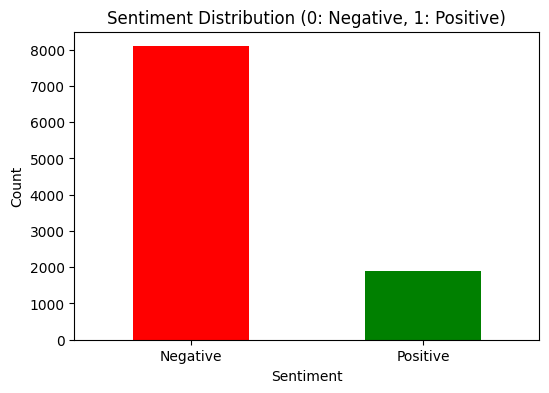

In [16]:
sentiment_counts = df_cleaned['sentiment'].value_counts()
plt.figure(figsize=(6, 4))
sentiment_counts.plot(kind='bar', color=['red', 'green'])
plt.title('Sentiment Distribution (0: Negative, 1: Positive)')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'], rotation=0)
plt.show()


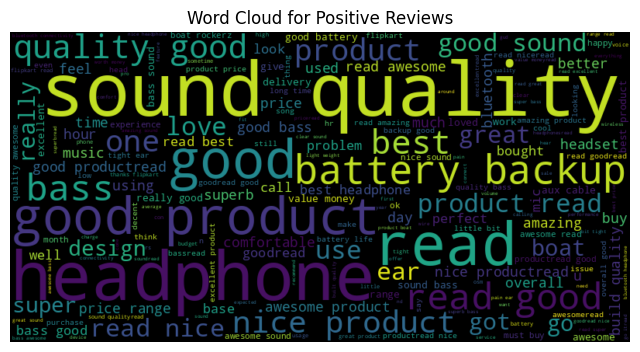

In [17]:
positive_reviews = df_cleaned[df_cleaned['sentiment'] == 1]['review']
positive_text = ' '.join(positive_reviews)
wordcloud = WordCloud(width=800, height=400).generate(positive_text)

plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df_cleaned['review'])
y = df_cleaned['sentiment']


In [19]:
# prompt: find accuracy using randomforest

from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42) # You can adjust n_estimators
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Random Forest Classifier: {accuracy}")


Accuracy of Random Forest Classifier: 0.8977955911823647


Accuracy of KNN Classifier: 0.8376753507014028
[[  48  308]
 [  16 1624]]


Text(70.72222222222221, 0.5, 'Truth')

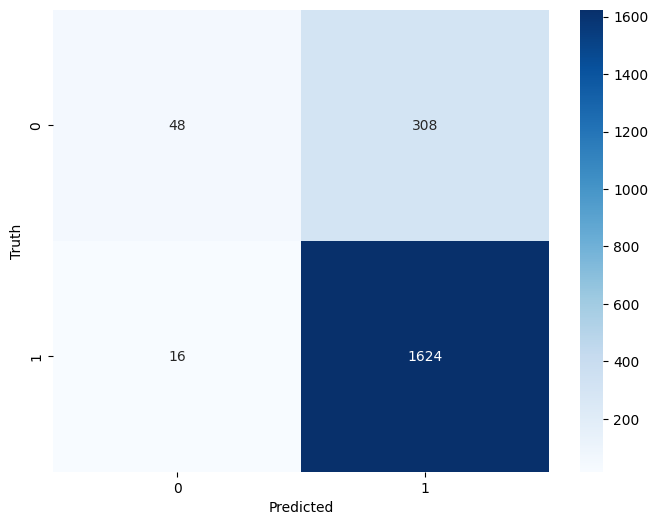

In [20]:

import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn_classifier = KNeighborsClassifier(n_neighbors=5) # You can adjust n_neighbors
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of KNN Classifier: {accuracy}")
cm = confusion_matrix(y_test, y_pred)
print(cm)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [21]:

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=5000)
X = vectorizer.fit_transform(df_cleaned['review'])
y = df_cleaned['sentiment']